<a href="https://colab.research.google.com/github/mantrir20/Cab-Booking-Application/blob/master/Q6_NNFl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[5.901612903225807, 2.748387096774194, 4.393548387096775, 1.4338709677419357]
[6.8500000000000005, 3.073684210526315, 5.742105263157893, 2.0710526315789473]
[5.005999999999999, 3.4180000000000006, 1.464, 0.2439999999999999]


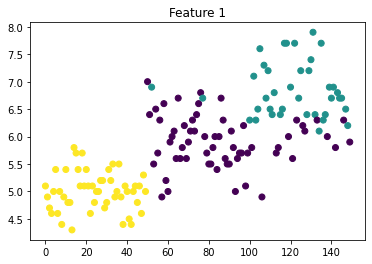

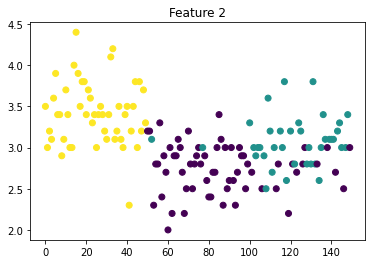

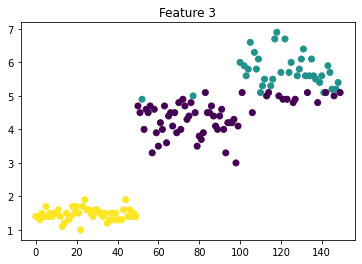

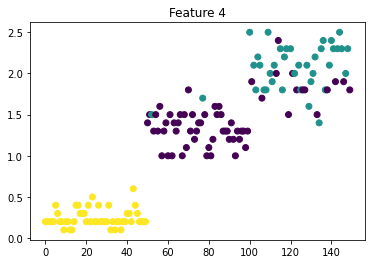

In [ ]:
'''
Name - Raunak Mantri
ID - 2017B5A71340H
'''
import pandas as pd
import cmath as math 
import numpy as np
import random
from random import randint
import matplotlib.pyplot as plt

def upload_x(file_name):
    data = pd.read_excel(file_name, header = None)
    x = feature_normalize(data)
    X = np.array(data)  
    return X

def feature_normalize(X):
    mins = np.mean(X, axis = 0) 
    maxs = np.std(X, axis = 0) 
    rng = maxs - mins 
    norm_X = ((X - mins)/maxs)
    return norm_X

# A function to calculate the mean of an array
def mean(val): 
    if len(val) == 0:
        return 0
    else:
        return sum(val) / len(val)

# A function to return a column of the data at the specified index
def col(array, i):
    return [row[i] for row in array]

# A function to return the max of two values
def higher(x,y):
    if x>y:
        return x
    else:
        return y

# A function to calculate the distance between two points
def dist(x,y):
    sum = 0
    for a in range(4):
        sum = sum + (x[a]-y[a])**2
    return (math.sqrt(sum)).real

# A function to calculate the distances from initialized centroids
def distcen_init(data,cen):
    distc1 = [0 for x in range(len(data))]
    distc2 = [0 for x in range(len(data))]
    distc3 = [0 for x in range(len(data))]
    for k in range(len(data)):
        distc1[k] = (dist(data[k],data[cen[0]]))
        distc2[k] = (dist(data[k],data[cen[1]]))
        distc3[k] = (dist(data[k],data[cen[2]]))
    return distc1, distc2, distc3

# A function to calculate the distances from centroids
def distcen(data,cen):
    distc1 = [0 for x in range(len(data))] #make array with 0s, size is equal to number of instances in data
    distc2 = [0 for x in range(len(data))]
    distc3 = [0 for x in range(len(data))]
    for k in range(len(data)):
        distc1[k] = (dist(data[k],cen[0]))
        distc2[k] = (dist(data[k],cen[1]))
        distc3[k] = (dist(data[k],cen[2]))
    return distc1, distc2, distc3

def getcol(data,c):
    col = []
    for i in range(len(data)):
        col.append(data[i][c])
    return col
    
# A function to implement min-max normalization
def norm(data):
    ndata = data
    for i in range(4):
        maxval = max(getcol(data,i))
        minval = min(getcol(data,i))
        for j in range(len(data)):
            ndata[j][i] = (data[j][i]-minval)/(maxval-minval)
    return ndata

def main():

    file_name = 'data2.xlsx'
    data = upload_x(file_name)

    # len(data) = number of columns

    # initiate the centroids
    randindex = [randint(0, len(data)) for b in range(3)] 
    dsvc1, dsvc2,dsvc3 = distcen_init(data,randindex)
    #Number of iterations
    #cval contains cluster indices 
    iters = 500

    for j in range(iters):
        # assign cluster indexes
        cval = [1 for x in range(len(data))]
        for l in range(len(data)):
            minDistVal = min(dsvc1[l],dsvc2[l],dsvc3[l])
            if minDistVal == dsvc1[l]:
                cval[l] = 1
            elif minDistVal == dsvc2[l]:
                cval[l] = 2
            else:
                cval[l] = 3
        
        # divide into clusters using cluster indexes found above
        clist1 = []
        clist2 = []
        clist3 = []

        for m in range(len(data)):
            if cval[m] == 1:
                clist1.append(data[m])
            elif cval[m] == 2:
                clist2.append(data[m])
            else:
                clist3.append(data[m])

        # update the centroids
        c1 = []
        c2 = []
        c3 = []
        for n in range(4):
            c1.append(mean(col(clist1,n)))
            c2.append(mean(col(clist2,n)))
            c3.append(mean(col(clist3,n)))
        cen = [c1,c2,c3]
        # update the distances from centroids
        dsvc1, dsvc2, dsvc3 = distcen(data,cen)

    print(c1)
    print(c2)
    print(c3)

    index = [0 for x in range(len(data))]
    for i in range(len(data)):
        index[i] = i+1

    plt.scatter(np.arange(len(data[:,0])),data[:,0],c=cval)
    plt.title('Feature 1')
    plt.show()
    plt.scatter(np.arange(len(data[:,1])),data[:,1],c=cval)
    plt.title('Feature 2')
    plt.show()
    plt.scatter(np.arange(len(data[:,2])),data[:,2],c=cval)
    plt.title('Feature 3')
    plt.show()
    plt.scatter(np.arange(len(data[:,3])),data[:,3],c=cval)
    plt.title('Feature 4')
    plt.show()

if __name__ == "__main__":
    main()

